<a href="https://colab.research.google.com/github/radhikasethi2011/SilencerEnhancerPredict/blob/main/colab/200%2C2_monte_carlo_100_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/radhikasethi2011/SilencerEnhancerPredict

Cloning into 'SilencerEnhancerPredict'...
remote: Enumerating objects: 464, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 464 (delta 43), reused 0 (delta 0), pack-reused 375
Receiving objects: 100% (464/464), 201.10 MiB | 40.03 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (85/85), done.


In [2]:
cd '/content/SilencerEnhancerPredict'

/content/SilencerEnhancerPredict


In [3]:
%mkdir curves/

In [4]:
from tensorflow.keras.optimizers import Adadelta
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adadelta
from sklearn import metrics
import h5py
import os

In [5]:
pwd

'/content/SilencerEnhancerPredict'

In [6]:
! gunzip /content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5

In [7]:
%pip install Bio
%pip install pybedtools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 270 kB 4.3 MB/s 
     |████████████████████████████████| 2.3 MB 21.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.5 MB 4.7 MB/s 
     |████████████████████████████████| 15.1 MB 31.8 MB/s 
  Created wheel for pybedtools: filename=pybedtools-0.9.0-cp37-cp37m-linux_x86_64.whl size=13616823 sha256=92dc88b51a5dae781d8d8f0110913328f57a04785cd4f0199f55e22a8ff7b4d3
  Stored in directory: /root/.cache/pip/wheels/7a/44/0d/3a7449885adaf8ebb157da8c3c834a712f48b3b3b84ba51dda
Successfully built pybedtools


In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:

tf.test.gpu_device_name()

'/device:GPU:0'

10% split in the data 

data len: 8246 

splitting that: 

train data: 6596 

test data: 825 

val data: 825

In [10]:
!python /content/SilencerEnhancerPredict/train_monte_carlo.py /content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5 /content/SilencerEnhancerPredict/examples/

Streaming output truncated to the last 5000 lines.
3181  [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...  [0.0, 1.0]
val data head:                                                   inputs     targets
3537  [[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  [0.0, 1.0]
759   [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...  [1.0, 0.0]
1176  [[1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...  [1.0, 0.0]
6924  [[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  [1.0, 0.0]
7255  [[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...  [1.0, 0.0]
Epoch 1/200
104/104 [==============================] - ETA: 0s - loss: 0.0331 - accuracy: 0.9958
Epoch 1: val_loss did not improve from 0.01044
104/104 [==============================] - 2s 24ms/step - loss: 0.0331 - accuracy: 0.9958 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 2/200
102/104 [============================>.] - ETA: 0s - loss: 0.0278 - accuracy: 0.9977
Epoch 2: val_loss did not improve from 0.01044
104/104 [============================

In [15]:
import numpy as np

with open('/content/SilencerEnhancerPredict/examples/test_auc.txt') as f:
    lines = np.asarray(f.read())

lines

array('[0.6169422167869993, 0.40063473405818395, 0.6373992661026748, 0.4497013240516451, 0.8208798184874739, 0.7962071519255184, 0.8275919929349426, 0.7876969418852295, 0.5319247722597708, 0.5970768324992641, 0.7805144032921811, 0.8244472654183858, 0.814756025867137, 0.8112833834869286, 0.8340111905209704, 0.8077372906259184, 0.8258561118841536, 0.8449130710958452, 0.8126197726230645, 0.8255433313351435, 0.8320949480936313, 0.8469269015127472, 0.8222363584959005, 0.824757093116266, 0.8216989115870144, 0.8228485390297839, 0.824452267331155, 0.8402895275506703, 0.8146011186340889, 0.8215587592013358, 0.8386243386243386, 0.7966393124610556, 0.8131142145107443, 0.8232614726349445, 0.7961240082280341, 0.8204291593180482, 0.8340290679899345, 0.8349609145063691, 0.8150350761552767, 0.826104871559417, 0.8204574970484061, 0.8191540650502105, 0.8130020109839711, 0.8152616108171664, 0.8279270565476893, 0.8240966050688862, 0.8137674681221474, 0.779326685637685, 0.8203392221164356, 0.82341269841269

In [18]:
type(lines)

numpy.ndarray

In [19]:
x = [0.6169422167869993, 0.40063473405818395, 0.6373992661026748, 0.4497013240516451, 0.8208798184874739, 0.7962071519255184, 0.8275919929349426, 0.7876969418852295, 0.5319247722597708, 0.5970768324992641, 0.7805144032921811, 0.8244472654183858, 0.814756025867137, 0.8112833834869286, 0.8340111905209704, 0.8077372906259184, 0.8258561118841536, 0.8449130710958452, 0.8126197726230645, 0.8255433313351435, 0.8320949480936313, 0.8469269015127472, 0.8222363584959005, 0.824757093116266, 0.8216989115870144, 0.8228485390297839, 0.824452267331155, 0.8402895275506703, 0.8146011186340889, 0.8215587592013358, 0.8386243386243386, 0.7966393124610556, 0.8131142145107443, 0.8232614726349445, 0.7961240082280341, 0.8204291593180482, 0.8340290679899345, 0.8349609145063691, 0.8150350761552767, 0.826104871559417, 0.8204574970484061, 0.8191540650502105, 0.8130020109839711, 0.8152616108171664, 0.8279270565476893, 0.8240966050688862, 0.8137674681221474, 0.779326685637685, 0.8203392221164356, 0.8234126984126984, 0.8207214952830745, 0.8369554966106689, 0.8329876985436206, 0.8299911842491918, 0.7854422568322068, 0.8145001940651353, 0.8220585122645281, 0.8207972689323364, 0.8272471083812818, 0.8359504132231406, 0.8020649384285747, 0.8153972438303931, 0.8240153822633566, 0.8321295817061121, 0.7899972944996001, 0.81070928906498, 0.7839022899327597, 0.8446655316734057, 0.829961771264734, 0.8192168546499254, 0.8359616992709671, 0.8167285587975244, 0.8274632569077014, 0.8338509316770186, 0.8317889983772724, 0.8347802495930549, 0.8017501792493859, 0.8028004701733765, 0.8163137314944586, 0.8115627536078474, 0.8132852516926701, 0.8310345639203041, 0.8046608519126134, 0.8287086761008888, 0.8290418704156479, 0.833588514492327, 0.8501434231099303, 0.8374582411894791, 0.8226657381944361, 0.8441046417273295, 0.818978286681636, 0.7834638033781163, 0.8112780358953797, 0.8253017368266117, 0.8321766338869806, 0.8101595006934813, 0.8257049496338611, 0.8146562874814798, 0.8353168769771737, 0.8133199322894625]

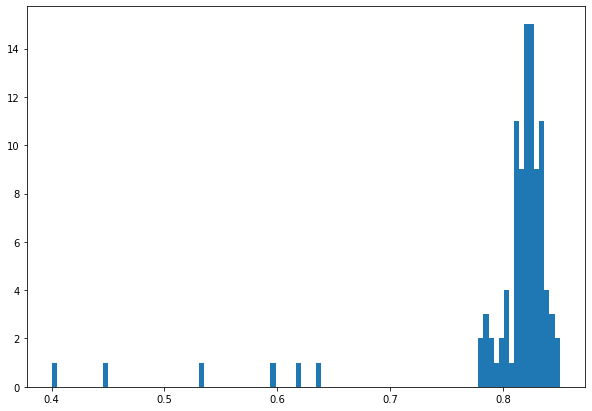

In [25]:
from matplotlib import pyplot as plt
import numpy as np


# Creating dataset


# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(x, bins = 100)

# Show plot
plt.show()


generated files: 

/examples/auc.txt

/examples/fpr_threshold_scores.txt

/examples/test_auc.txt

/examples/test_acc.txt

/examples/data_prediction.hdf5.pred.data



montecarlo


In [35]:
data = load_dataset('/content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5')

X_train = data["train_data"]
Y_train = data["train_labels"]
X_validation = data["val_data"]
Y_validation = data["val_labels"]
X_test = data["test_data"]
Y_test = data["test_labels"]
fold_no = 1

inputs = np.concatenate((data["train_data"], data["val_data"]), axis=0)
inputs = np.concatenate((inputs, data["test_data"]), axis=0)
targets = np.concatenate((data["train_labels"], data["val_labels"]), axis=0)
targets = np.concatenate((targets, data["test_labels"]), axis=0)

dataset = pd.DataFrame({'inputs': list(inputs), 'targets': list(targets)}, columns=['inputs', 'targets'])
train, test = train_test_split(dataset, test_size=0.1, random_state=42)
trainn, val = train_test_split(train, test_size=0.11117, random_state=42)

reading enhancers...


In [36]:
trainn

,inputs,targets
5980,"[[1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[0.0, 1.0]"
1432,"[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[1.0, 0.0]"
5062,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [...","[0.0, 1.0]"
3767,"[[1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[0.0, 1.0]"
4718,"[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...","[1.0, 0.0]"
...,...,...
409,"[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...","[0.0, 1.0]"
2169,"[[0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[0.0, 1.0]"
277,"[[1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[0.0, 1.0]"
3771,"[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...","[1.0, 0.0]"


In [39]:
X_train_kff = trainn['inputs'].to_numpy()
X_train_kff.shape

(6596,)

In [40]:
kfff = np.stack(trainn['inputs'].to_numpy()) 
kfff.shape

(6596, 200, 4)

In [41]:
import numpy as np
from sklearn.model_selection import KFold
def load_dataset(Dfile):

    print("reading enhancers...")
    data = {}
    with h5py.File(Dfile, "r") as inf:
        for _key in inf:
            data[_key] = inf[_key][()]
    return data

data = load_dataset('/content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5')

X_train = data["train_data"]
Y_train = data["train_labels"]
X_validation = data["val_data"]
Y_validation = data["val_labels"]
X_test = data["test_data"]
Y_test = data["test_labels"]
fold_no = 1

inputs = np.concatenate((data["train_data"], data["val_data"]), axis=0)
inputs = np.concatenate((inputs, data["test_data"]), axis=0)
targets = np.concatenate((data["train_labels"], data["val_labels"]), axis=0)
targets = np.concatenate((targets, data["test_labels"]), axis=0)

for i in range(2):
      #print("TRAIN:", train_index, "TEST:", test_index)
      print("fold number: ", fold_no)
      print(" ")
      dataset = pd.DataFrame({'inputs': list(inputs), 'targets': list(targets)}, columns=['inputs', 'targets'])
      train, test = train_test_split(dataset, test_size=0.1, random_state=42)
      trainn, val = train_test_split(train, test_size=0.11117, random_state=42)

      print('train data len: ', len(trainn))
      print('test data len: ', len(test))
      print('val data len: ', len(val))
      
      X_train_kf, X_test_kf, X_val_kf =  np.stack(trainn['inputs'].to_numpy()) ,  np.stack(test['inputs'].to_numpy()) ,  np.stack(val['inputs'].to_numpy()) 
      print('len of X_train_kf[0]: ', len(X_train_kf[0]))
      print('type of X_train_kf: ', type(X_train_kf))
      l_X_train_kf = len(X_train_kf)
      print("shape : ", X_train_kf.shape)
      #print("inputs", len(inputs))
      y_train_kf, y_test_kf, y_val_kf = np.asarray(trainn['targets']), np.asarray(test['targets']), np.asarray(val['targets'])
      #print("targets", len(targets))
      fold_no = fold_no + 1

reading enhancers...
fold number:  1
 
train data len:  6596
test data len:  825
val data len:  825
len of X_train_kf[0]:  200
type of X_train_kf:  <class 'numpy.ndarray'>
shape :  (6596, 200, 4)
fold number:  2
 
train data len:  6596
test data len:  825
val data len:  825
len of X_train_kf[0]:  200
type of X_train_kf:  <class 'numpy.ndarray'>
shape :  (6596, 200, 4)


In [12]:
len(X_train_kf)

4123

In [16]:
import pandas as pd
dataset = pd.DataFrame({'inputs': list(inputs), 'targets': list(targets)}, columns=['inputs', 'targets'])
dataset

,inputs,targets
0,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[0.0, 1.0]"
1,"[[0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[0.0, 1.0]"
2,"[[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...","[1.0, 0.0]"
3,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[0.0, 1.0]"
4,"[[0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 1.0, 0.0], [...","[1.0, 0.0]"
...,...,...
8241,"[[0.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0], [...","[0.0, 1.0]"
8242,"[[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[1.0, 0.0]"
8243,"[[0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0.0], [...","[1.0, 0.0]"
8244,"[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0], [...","[1.0, 0.0]"


In [17]:
dataset['inputs'][0].shape

(200, 4)

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.1)
len(test)

825

In [19]:
trainn, val = train_test_split(train, test_size=0.11117)
len(val)

825

In [20]:
X = np.asarray(trainn['inputs'])
print('yo: ',type(X))

yo:  <class 'numpy.ndarray'>


In [21]:
type(trainn['inputs'])

pandas.core.series.Series

normal cross val

In [22]:

def train_val_divide(mat):
  len_m=len(mat)
  len_75 = int(((len_m*3)/4))
  #len_25 = len_m -  len_75
  mat_train=mat[:len_75]
  mat_val=mat[len_75:]
  return mat_train,mat_val


In [30]:
data = load_dataset('/content/SilencerEnhancerPredict/examples/training_200seq_2class.hdf5')

X_train = data["train_data"]
Y_train = data["train_labels"]
X_validation = data["val_data"]
Y_validation = data["val_labels"]
X_test = data["test_data"]
Y_test = data["test_labels"]
kfold = KFold(n_splits=2, shuffle=True)

inputs = np.concatenate((data["train_data"], data["val_data"]), axis=0)
inputs = np.concatenate((inputs, data["test_data"]), axis=0)
targets = np.concatenate((data["train_labels"], data["val_labels"]), axis=0)
targets = np.concatenate((targets, data["test_labels"]), axis=0)


fold_no = 1
train_acc_per_fold=[]
train_loss_per_fold=[]
test_acc_per_fold=[]
test_auc_per_fold=[]

for train_index, test_index in kfold.split(inputs):
  #print("TRAIN:", train_index, "TEST:", test_index)
  print(fold_no)
  print(" ")

  X_train_kf, X_test_kf = inputs[train_index], inputs[test_index]
  print("X_train_kf len ", len(X_train_kf))
  l_X_train_kf = len(X_train_kf)
  print("X_train_kf type ", type(X_train_kf))
  X_train_kf.reshape(l_X_train_kf,200,4)
  X_test_kf.reshape(4123,200,4)
  print("shape : ", X_train_kf.shape)
  print(X_train_kf)
  y_train_kf, y_test_kf = targets[train_index], targets[test_index]
  y_train_kf.reshape(4123,200,4)
  y_test_kf.reshape(4123,200,4)
  #print("targets", len(targets))
  #print("x_train_kf", len(X_train_kf))
  #print("x_test_kf", len(X_test_kf))

  X_train_kf_1, X_val_kf = train_val_divide(X_train_kf)
  X_train_kf_1.reshape(4123,200,4)
  X_val_kf.reshape(4123,200,4)
  #print("X_train_kf_1 length = ", len(X_train_kf_1))
  #print("X_val_kf length = ", len(X_val_kf))

  y_train_kf_1, y_val_kf = train_val_divide(y_train_kf)
  y_train_kf_1.reshape(4123,200,4)
  y_val_kf.reshape(4123,200,4)
  #print("y_train_kf_1 length = ", len(y_train_kf_1))
  #print("y_val_kf length = ", len(y_val_kf))


reading enhancers...
1
 
X_train_kf len  4123
X_train_kf type  <class 'numpy.ndarray'>
shape :  (4123, 200, 4)
[[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]]

 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [1. 0. 0. 0.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]]

 ...

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]
  ...
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]]

 [[0. 0. 0. 1.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]]]
1
 
X_train_kf len  4123
X_train_kf type  <class 'numpy.ndarray'>
shape :  (4123, 200, 4)
[[[0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 1. 0. 0.]]

 [[1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [1. 0. 0. 0.]
  ...
  [0. 0. 0.

In [ ]:
%rm-rf /content/sample_data